<a href="https://www.kaggle.com/code/mdromzanalom/data-mining-project?scriptVersionId=158138814" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ----Start Program----

# Library Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, mean_absolute_error, mean_squared_error, roc_curve, roc_auc_score
from scipy.sparse import hstack
import time

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_18/1563234269.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling

# Dataset Loading

In [2]:
# Load the CSV file
data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Class Distribution

stroke
0    4861
1     249
Name: count, dtype: int64


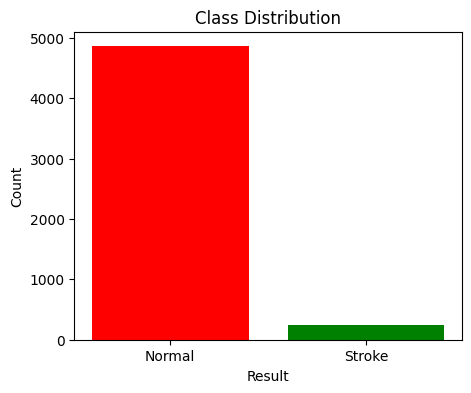

In [6]:
# Count the number of instances in each class
class_counts = data['stroke'].value_counts()
print(class_counts)
# Plot the class distribution
beingsaved = plt.figure(figsize=(5, 4))
colors = ['red', 'green']
plt.bar(['Normal', 'Stroke'], class_counts.values, color=colors)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

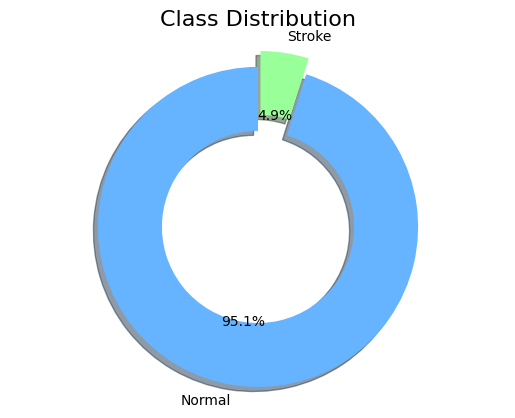

In [7]:
colors = ['#66b3ff', '#99ff99']
explode = (0, 0.1)
plt.pie(data['stroke'].value_counts(), labels=['Normal', 'Stroke'], autopct='%1.1f%%',
        startangle=90, wedgeprops=dict(width=0.4), colors=colors, explode=explode, shadow=True)
fig = plt.gcf()
plt.axis('equal')
plt.title('Class Distribution', fontsize=16)
plt.show()

# Data Pre-processing

In [8]:
data.shape

(5110, 12)

In [9]:
#Check the null value
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
data=data.fillna(method='bfill')
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
data=data.drop_duplicates()
data.shape

(5110, 12)

In [12]:
# Encode categorical features
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

PairPlot

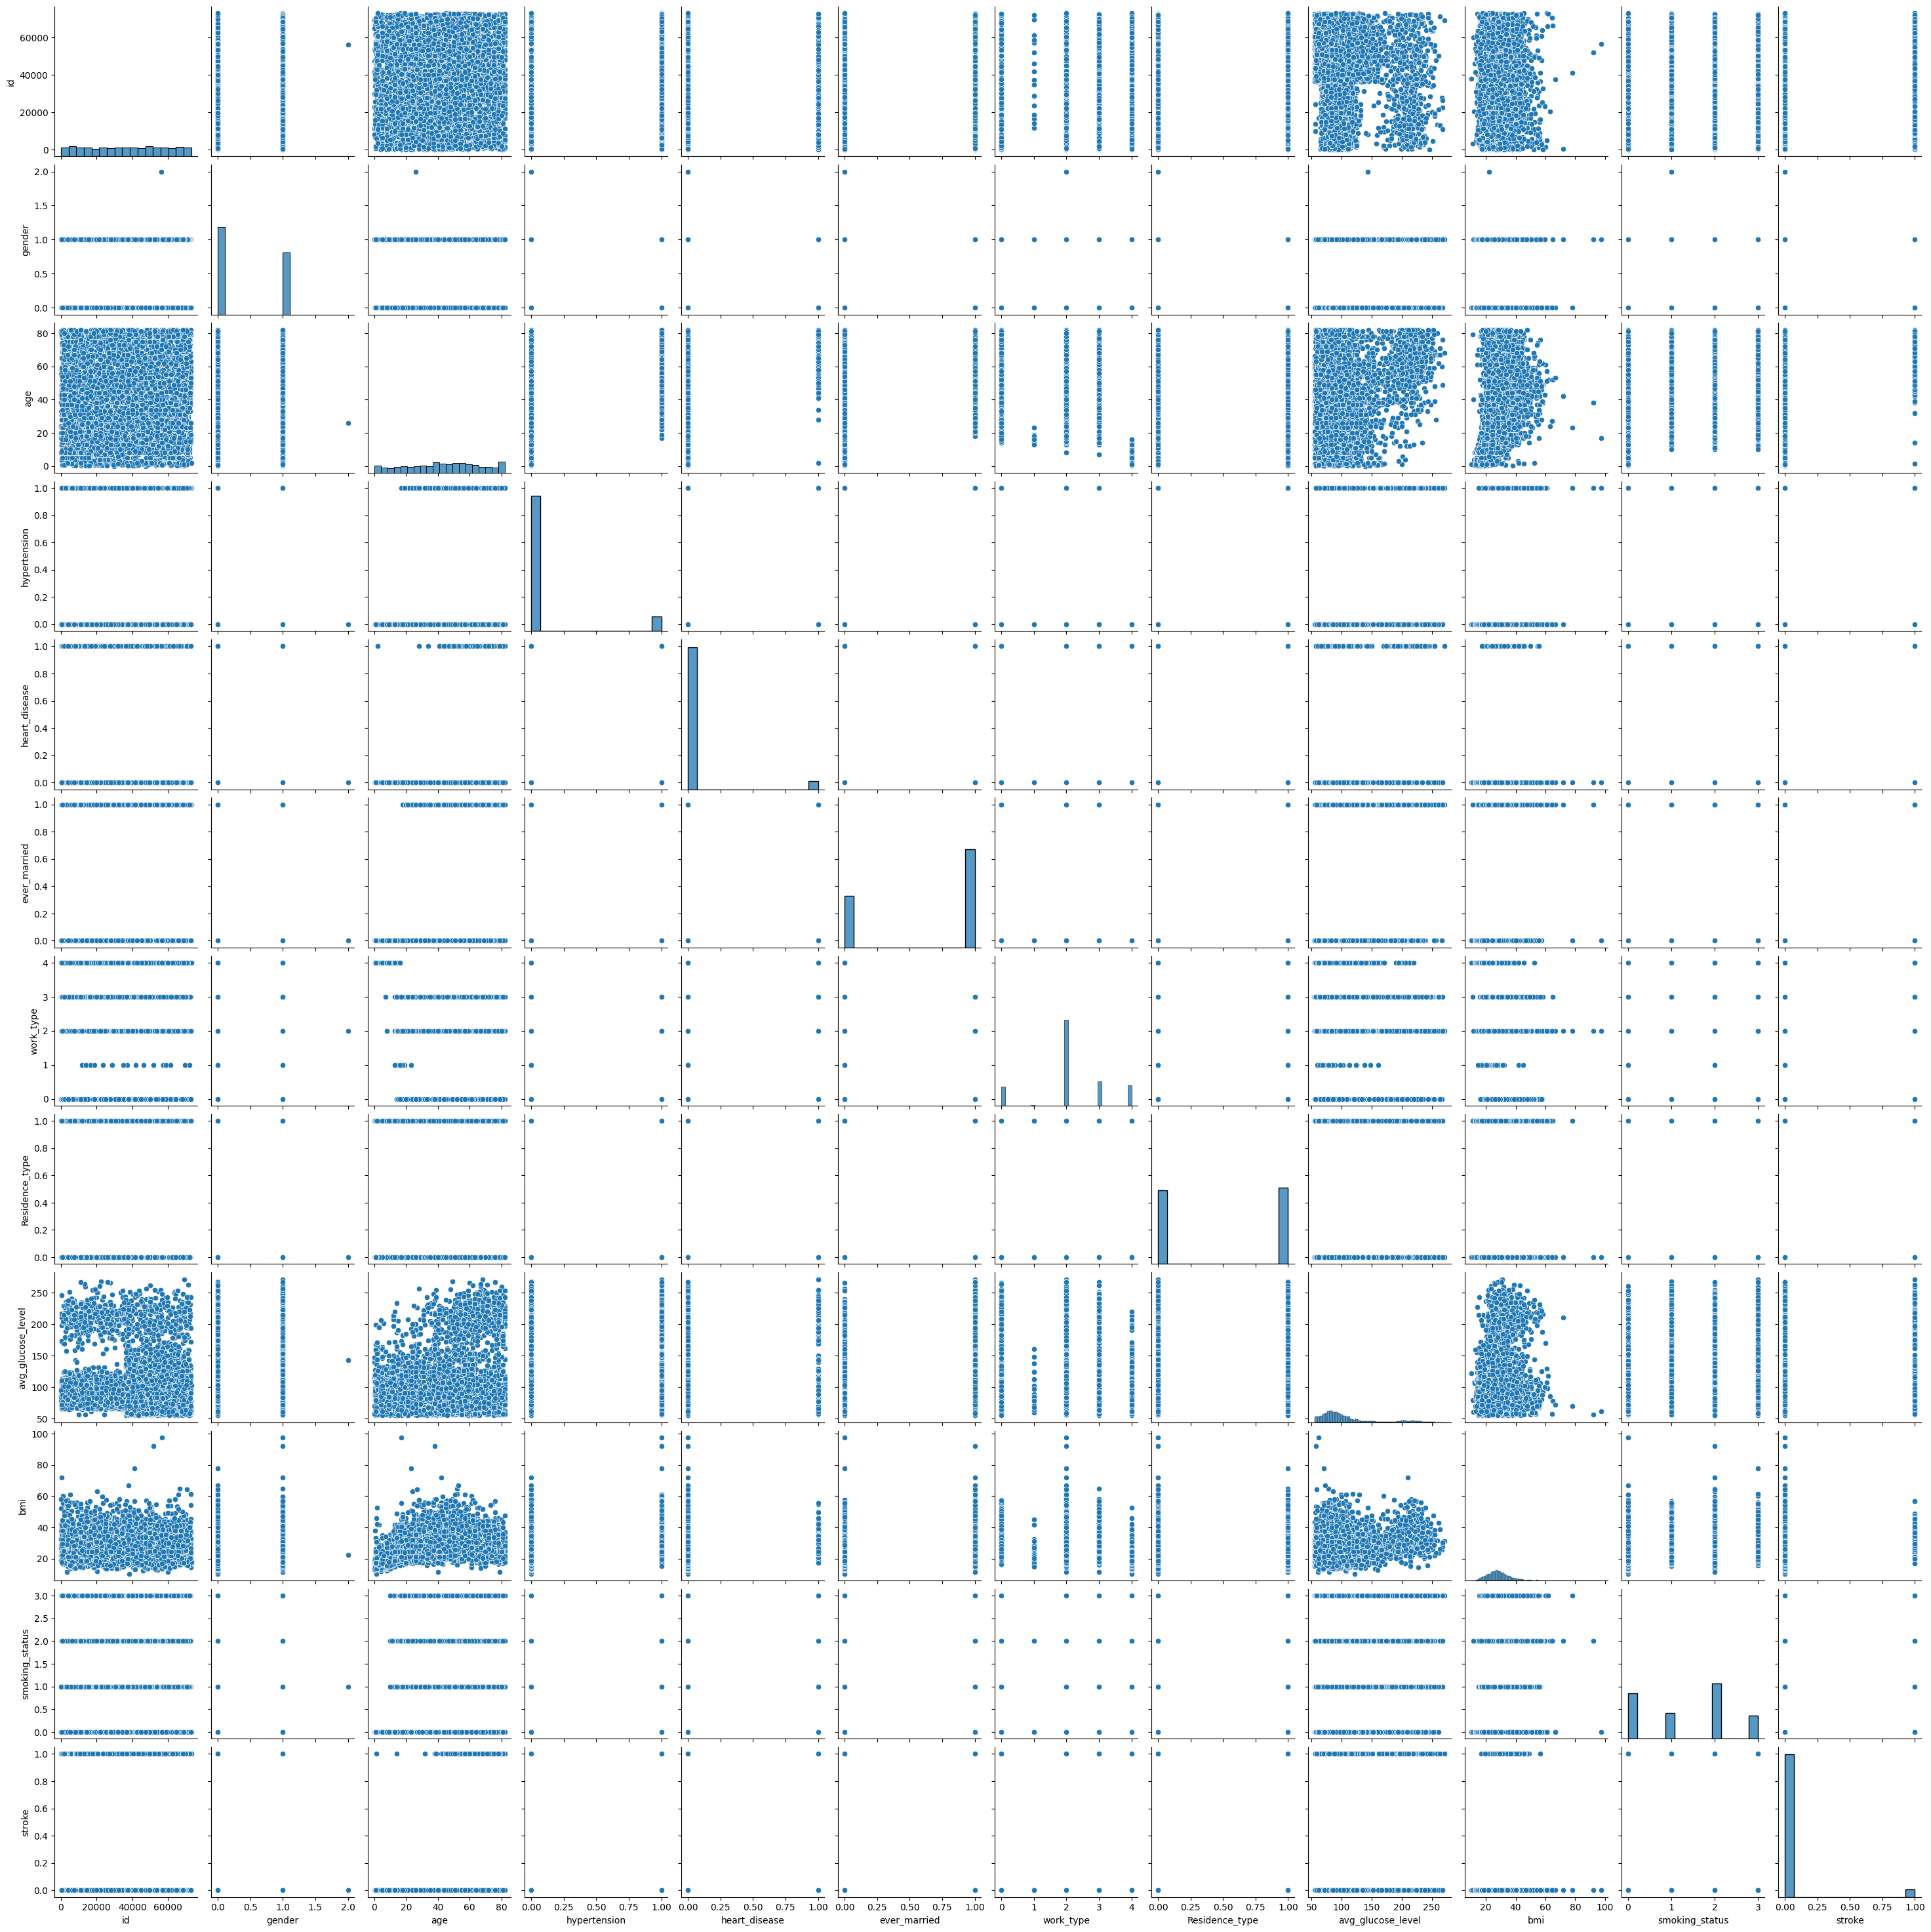

In [13]:
# Generate the pairplot
pairplot = sns.pairplot(data)

# Show the pairplot
plt.show()

Correlation matrix

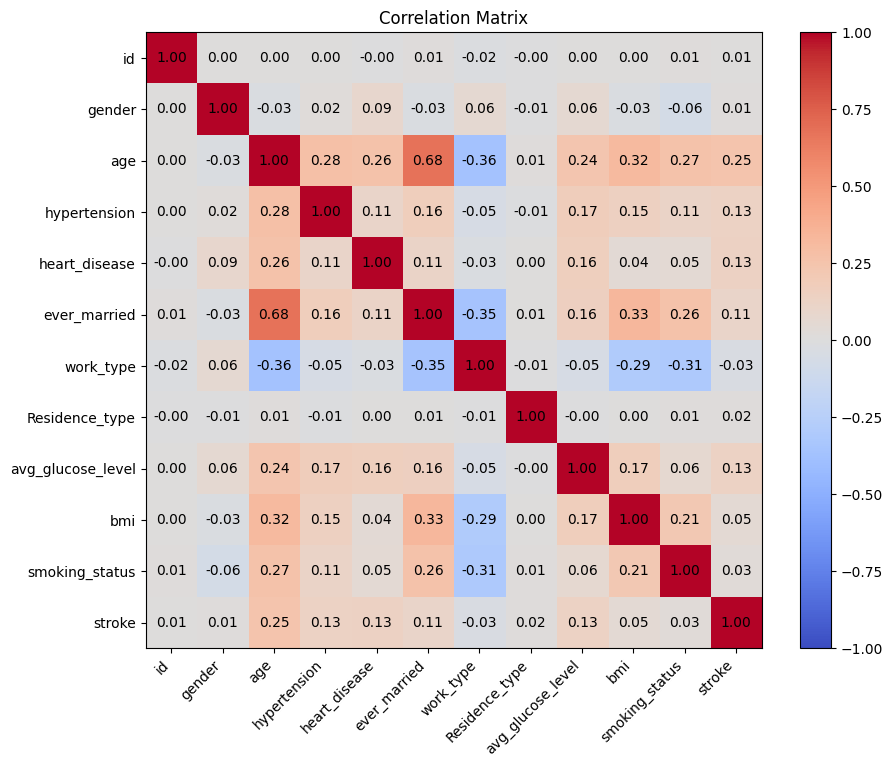

In [14]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap
heatmap = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Set the tick labels and rotation
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha="right")
ax.set_yticklabels(correlation_matrix.columns)

# Add the correlation coefficient values inside the heatmap
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")

# Add a colorbar
cbar = plt.colorbar(heatmap)

# Set the title
ax.set_title("Correlation Matrix")

# Show the plot
plt.show()

# Features and labels selection

In [15]:
# Drop the 'id' column
data = data.drop('id', axis=1)

# Split the data into features and target variable
X = data.drop('stroke', axis=1)
y = data['stroke']

# Balanced the dataset and Splitting dataset

In [16]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Balanced Distribution

stroke
1    4861
0    4861
Name: count, dtype: int64


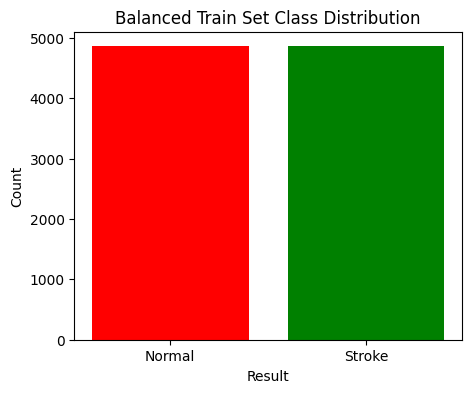

In [17]:
# Count the number of instances in each class
import matplotlib.pyplot as plt
class_counts = y_resampled.value_counts()
print(class_counts)
# Plot the class distribution
beingsaved = plt.figure(figsize=(5, 4))
colors = ['red', 'green']
plt.bar(['Normal', 'Stroke'], class_counts.values, color=colors)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Balanced Train Set Class Distribution')
plt.show()

# All Model Train and evaluate

Model: SVM
Accuracy: 0.7701799485861183
Confusion Matrix:
[[697 278]
 [169 801]]
F1 Score: 0.7818448023426062
Recall: 0.8257731958762886
Precision: 0.742354031510658
Mean Absolute Error: 0.22982005141388176
Root Mean Squared Error: 0.47939550625123906
ROC AUC Score: 0.7703224953740417
Execution Time: 1.9268486499786377 seconds


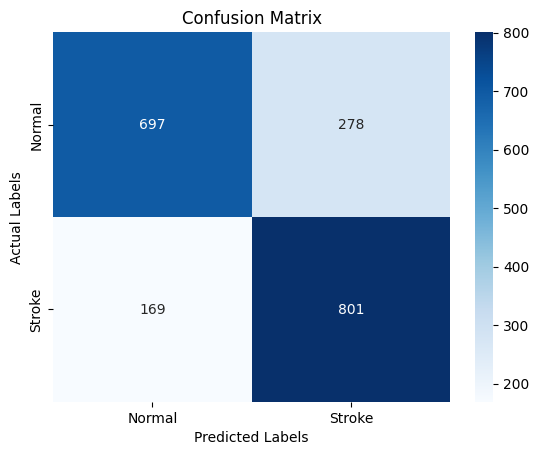

---------------------------------------
Model: Decision Tree
Accuracy: 0.9069408740359897
Confusion Matrix:
[[853 122]
 [ 59 911]]
F1 Score: 0.9096355466799801
Recall: 0.9391752577319588
Precision: 0.8818973862536302
Mean Absolute Error: 0.09305912596401028
Root Mean Squared Error: 0.3050559390734924
ROC AUC Score: 0.9070235263018769
Execution Time: 0.0420379638671875 seconds


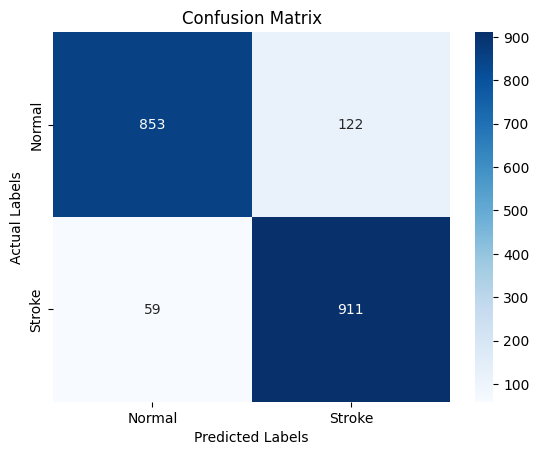

---------------------------------------
Model: Random Forest
Accuracy: 0.9455012853470437
Confusion Matrix:
[[904  71]
 [ 35 935]]
F1 Score: 0.9463562753036437
Recall: 0.9639175257731959
Precision: 0.9294234592445328
Mean Absolute Error: 0.0544987146529563
Root Mean Squared Error: 0.23344959767143805
ROC AUC Score: 0.9455485064763416
Execution Time: 1.1694962978363037 seconds


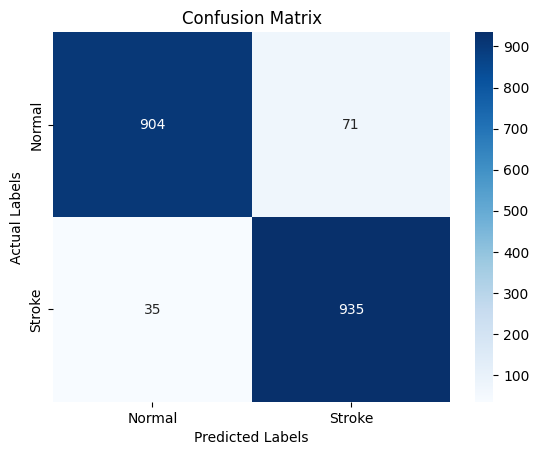

---------------------------------------
Model: Logistic Regression
Accuracy: 0.8071979434447301
Confusion Matrix:
[[762 213]
 [162 808]]
F1 Score: 0.8116524359618283
Recall: 0.8329896907216495
Precision: 0.791380999020568
Mean Absolute Error: 0.1928020565552699
Root Mean Squared Error: 0.4390923098339003
ROC AUC Score: 0.8072640761300556
Execution Time: 0.15400934219360352 seconds


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


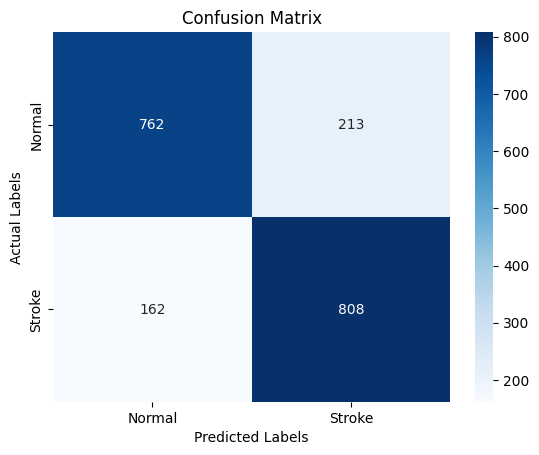

---------------------------------------
Model: Gradient Boosting
Accuracy: 0.8622107969151671
Confusion Matrix:
[[800 175]
 [ 93 877]]
F1 Score: 0.8674579624134521
Recall: 0.9041237113402062
Precision: 0.8336501901140685
Mean Absolute Error: 0.13778920308483292
Root Mean Squared Error: 0.3711996808792175
ROC AUC Score: 0.8623182659265133
Execution Time: 1.155264139175415 seconds


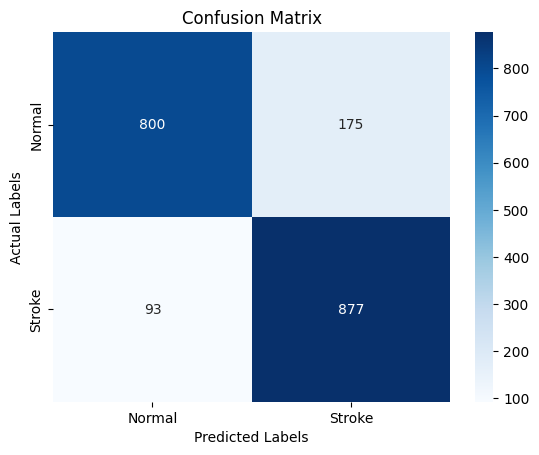

---------------------------------------
Model: Gaussian Naive Bayes
Accuracy: 0.7768637532133676
Confusion Matrix:
[[701 274]
 [160 810]]
F1 Score: 0.7887049659201557
Recall: 0.8350515463917526
Precision: 0.7472324723247232
Mean Absolute Error: 0.22313624678663238
Root Mean Squared Error: 0.47237299540366656
ROC AUC Score: 0.7770129526830558
Execution Time: 0.009907722473144531 seconds


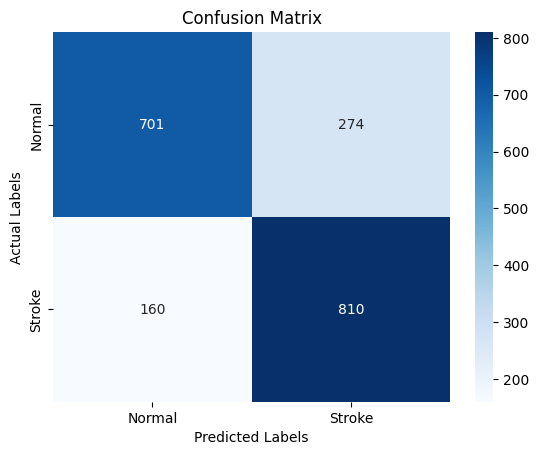

---------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.889974293059126
Confusion Matrix:
[[784 191]
 [ 23 947]]
F1 Score: 0.8984819734345352
Recall: 0.9762886597938144
Precision: 0.8321616871704746
Mean Absolute Error: 0.11002570694087403
Root Mean Squared Error: 0.3317012314431076
ROC AUC Score: 0.8901956119481893
Execution Time: 0.013288021087646484 seconds


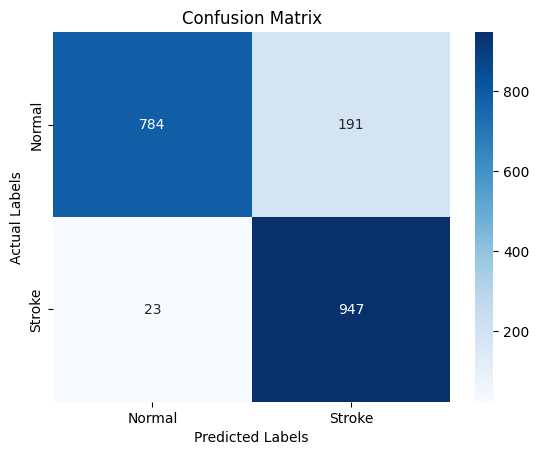

---------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: Neural Network
Accuracy: 0.8447300771208226
Confusion Matrix:
[[806 169]
 [133 837]]
F1 Score: 0.847165991902834
Recall: 0.8628865979381444
Precision: 0.8320079522862823
Mean Absolute Error: 0.15526992287917737
Root Mean Squared Error: 0.39404304698748
ROC AUC Score: 0.8447766323024055
Execution Time: 13.694607496261597 seconds


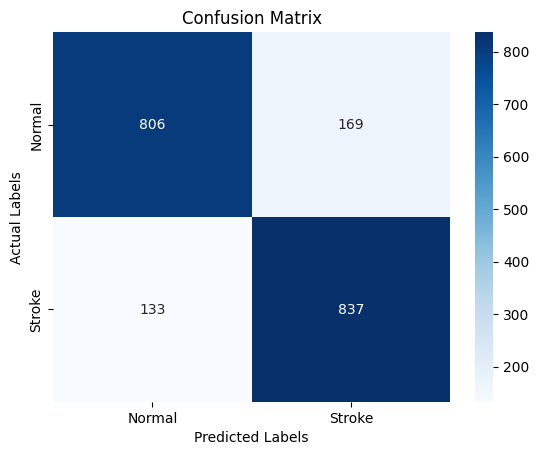

---------------------------------------


In [18]:
# Initialize the classifiers
svm = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
logistic_regression = LogisticRegression()
gradient_boosting = GradientBoostingClassifier()
gaussian_nb = GaussianNB()
knn = KNeighborsClassifier()
neural_network = MLPClassifier()

# Train and evaluate the classifiers
classifiers = {
    'SVM': svm,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'Logistic Regression': logistic_regression,
    'Gradient Boosting': gradient_boosting,
    'Gaussian Naive Bayes': gaussian_nb,
    'K-Nearest Neighbors': knn,
    'Neural Network': neural_network
}

for clf_name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()  
    
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print(f"Model: {clf_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"F1 Score: {f1}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"ROC AUC Score: {roc_auc}")
    
    # Calculate execution time
    execution_time = end_time - start_time
    print(f"Execution Time: {execution_time} seconds")
    
     # Create a heatmap of the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=["Normal", "Stroke"], yticklabels=["Normal", "Stroke"])

    # Set the axis labels and title
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title("Confusion Matrix")

    # Display the confusion matrix
    plt.show()
    
    print("---------------------------------------")

Cross Validation

In [19]:
# Train and evaluate each classifier using cross-validation
for name, classifier in classifiers.items():
    print(f"Model: {name}")

    # Perform cross-validation
    scores = cross_val_score(classifier, X_resampled, y_resampled, cv=10)

    # Print cross-validation scores
    print("Cross-Validation Scores:", scores)
    print("Average Cross-Validation Score:", scores.mean())
    print("---------------------------------------")

Model: SVM
Cross-Validation Scores: [0.77081192 0.77903392 0.76028807 0.7808642  0.75       0.78703704
 0.77366255 0.77777778 0.80452675 0.79115226]
Average Cross-Validation Score: 0.7775154479590931
---------------------------------------
Model: Decision Tree
Cross-Validation Scores: [0.84378212 0.92805755 0.91769547 0.93106996 0.90843621 0.91460905
 0.91563786 0.93518519 0.92489712 0.91872428]
Average Cross-Validation Score: 0.913809481515317
---------------------------------------
Model: Random Forest
Cross-Validation Scores: [0.86742035 0.95580678 0.96193416 0.95679012 0.95473251 0.9537037
 0.95061728 0.95884774 0.95576132 0.95164609]
Average Cross-Validation Score: 0.946726005439035
---------------------------------------
Model: Logistic Regression


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Scores: [0.74306269 0.82631038 0.80246914 0.82613169 0.79938272 0.8127572
 0.80349794 0.83744856 0.82716049 0.82201646]
Average Cross-Validation Score: 0.810023727050106
---------------------------------------
Model: Gradient Boosting
Cross-Validation Scores: [0.79033916 0.87975334 0.86213992 0.87345679 0.87037037 0.87139918
 0.86831276 0.89197531 0.90226337 0.88065844]
Average Cross-Validation Score: 0.8690668629117869
---------------------------------------
Model: Gaussian Naive Bayes
Cross-Validation Scores: [0.74511819 0.77492292 0.76851852 0.79012346 0.77983539 0.79218107
 0.7808642  0.79218107 0.80349794 0.7973251 ]
Average Cross-Validation Score: 0.7824567858940361
---------------------------------------
Model: K-Nearest Neighbors
Cross-Validation Scores: [0.89928058 0.91161357 0.89506173 0.89814815 0.88168724 0.8909465
 0.89197531 0.90329218 0.90226337 0.89506173]
Average Cross-Validation Score: 0.8969330355821162
---------------------------------------
Model: 

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores: [0.74614594 0.83556012 0.82510288 0.85082305 0.79835391 0.84979424
 0.80246914 0.86213992 0.85699588 0.84567901]
Average Cross-Validation Score: 0.8273064088411811
---------------------------------------


# Manual Testing

In [20]:
import pandas as pd
import numpy as np

# Take input from the user
input_data = {
    'gender': 1,
    'age': 23,
    'hypertension': 0,
    'heart_disease': 0,
    'ever_married': 0,
    'work_type': 1,
    'Residence_type': 0,
    'avg_glucose_level': 192.44,
    'bmi': 19.4,
    'smoking_status': 1
}

# Preprocess the input data
input_df = pd.DataFrame([input_data])

# Handle unknown categories in input data
for column in categorical_columns:
    input_df[column] = input_df[column].map(lambda x: 'unknown' if x not in label_encoders[column].classes_ else x)

# Update label encoders to include 'unknown' category
for column in categorical_columns:
    label_encoders[column].classes_ = np.append(label_encoders[column].classes_, 'unknown')

# Encode input data using label encoders
for column in categorical_columns:
    input_df[column] = label_encoders[column].transform(input_df[column])

# Predict the class using each classifier
for clf_name, clf in classifiers.items():
    prediction = clf.predict(input_df)
    print(f"Model: {clf_name}")
    print(f"Prediction: {'Stroke' if prediction[0] == 1 else 'No Stroke'}")
    print("---------------------------------------")

Model: SVM
Prediction: No Stroke
---------------------------------------
Model: Decision Tree
Prediction: No Stroke
---------------------------------------
Model: Random Forest
Prediction: No Stroke
---------------------------------------
Model: Logistic Regression
Prediction: No Stroke
---------------------------------------
Model: Gradient Boosting
Prediction: No Stroke
---------------------------------------
Model: Gaussian Naive Bayes
Prediction: No Stroke
---------------------------------------
Model: K-Nearest Neighbors
Prediction: No Stroke
---------------------------------------
Model: Neural Network
Prediction: No Stroke
---------------------------------------
